# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Print to logger
print("Beginning Data Retrieval")
print("------------------------")

#variable for base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

#create counters
record_count = 1
set_count = 1

# Loop through cities
for i,city in enumerate(cities):
    if(i % 50 == 0 and i >=50):
        #reset the group
        set_count += 1
        record_count =1
        
    #create endpoint URL for each city
    city_url = f"{url}&q={city}"
    
    #log the record and set number
    print(f"processing city #{record_count} in group #{set_count} | {city}")
    record_count +=1
    
    try:
        city_weather = requests.get(city_url).json()

        #add a time delay
        time.sleep(2)

        #parse max temp, humidity, abd cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the city information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print(f"{city} has an error, skipping...")
        pass

#Indidcate data load is complete
print("-----------------------")
print("Date Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
processing city #1 in group #1 | saint george
processing city #2 in group #1 | mahebourg
processing city #3 in group #1 | jubayl
jubayl has an error, skipping...
processing city #4 in group #1 | port alfred
processing city #5 in group #1 | belushya guba
belushya guba has an error, skipping...
processing city #6 in group #1 | anamur
processing city #7 in group #1 | isangel
processing city #8 in group #1 | kifri
processing city #9 in group #1 | hermanus
processing city #10 in group #1 | georgetown
processing city #11 in group #1 | kapaa
processing city #12 in group #1 | samusu
samusu has an error, skipping...
processing city #13 in group #1 | east london
processing city #14 in group #1 | lagoa
processing city #15 in group #1 | rikitea
processing city #16 in group #1 | butaritari
processing city #17 in group #1 | fairbanks
processing city #18 in group #1 | kropotkin
processing city #19 in group #1 | raudeberg
processing city #20 in group #

processing city #23 in group #4 | ayan
processing city #24 in group #4 | yulara
processing city #25 in group #4 | prince rupert
processing city #26 in group #4 | borogontsy
processing city #27 in group #4 | epe
processing city #28 in group #4 | abu zabad
processing city #29 in group #4 | flinders
processing city #30 in group #4 | bajo baudo
bajo baudo has an error, skipping...
processing city #31 in group #4 | nyurba
processing city #32 in group #4 | grand gaube
processing city #33 in group #4 | dikson
processing city #34 in group #4 | hamilton
processing city #35 in group #4 | vila velha
processing city #36 in group #4 | tessalit
processing city #37 in group #4 | hofn
processing city #38 in group #4 | sydney mines
processing city #39 in group #4 | manizales
processing city #40 in group #4 | betare oya
processing city #41 in group #4 | sawakin
processing city #42 in group #4 | valdez
processing city #43 in group #4 | bathsheba
processing city #44 in group #4 | bambous virieux
processin

processing city #3 in group #8 | seymchan
processing city #4 in group #8 | panjab
processing city #5 in group #8 | coquimbo
processing city #6 in group #8 | iracoubo
processing city #7 in group #8 | ca mau
processing city #8 in group #8 | wanning
processing city #9 in group #8 | baboua
baboua has an error, skipping...
processing city #10 in group #8 | miles city
processing city #11 in group #8 | bilibino
processing city #12 in group #8 | santa cruz de rosales
santa cruz de rosales has an error, skipping...
processing city #13 in group #8 | dunedin
processing city #14 in group #8 | salto
processing city #15 in group #8 | shahreza
processing city #16 in group #8 | fort nelson
processing city #17 in group #8 | buqayq
buqayq has an error, skipping...
processing city #18 in group #8 | port hardy
processing city #19 in group #8 | avera
processing city #20 in group #8 | yabassi
processing city #21 in group #8 | majene
processing city #22 in group #8 | bonavista
processing city #23 in group #8

processing city #30 in group #11 | byron bay
processing city #31 in group #11 | dickinson
processing city #32 in group #11 | ampanihy
processing city #33 in group #11 | bourail
processing city #34 in group #11 | fare
processing city #35 in group #11 | bogorodskoye
processing city #36 in group #11 | tianpeng
processing city #37 in group #11 | seddon
processing city #38 in group #11 | idah
processing city #39 in group #11 | sokoni
processing city #40 in group #11 | yumen
processing city #41 in group #11 | saint-georges
processing city #42 in group #11 | sechura
processing city #43 in group #11 | ituni
ituni has an error, skipping...
processing city #44 in group #11 | trelew
processing city #45 in group #11 | aswan
processing city #46 in group #11 | ko samui
processing city #47 in group #11 | port hedland
processing city #48 in group #11 | teya
processing city #49 in group #11 | thabazimbi
processing city #50 in group #11 | berbera
processing city #1 in group #12 | biltine
processing city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,97.43,23,0,4.00,US,1661713132
1,mahebourg,-20.4081,57.7000,72.25,87,37,11.36,MU,1661713145
2,port alfred,-33.5906,26.8910,61.70,74,34,9.28,ZA,1661713149
3,anamur,36.0751,32.8369,81.03,60,0,9.80,TR,1661713154
4,isangel,-19.5500,169.2667,68.11,94,75,2.30,VU,1661713156


In [15]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,18.310697,23.623029,67.876963,69.982238,55.023091,8.004032,1.661714e+09
std,34.311644,89.903290,14.292297,21.620218,41.516123,4.980522,4.107062e+02
min,-54.800000,-175.200000,33.210000,6.000000,0.000000,0.000000,1.661713e+09
25%,-11.451950,-53.331350,55.680000,59.000000,8.000000,4.380000,1.661713e+09
50%,20.043100,29.535500,70.930000,76.000000,63.000000,6.910000,1.661714e+09
75%,49.551700,102.375250,78.405000,86.000000,100.000000,10.715000,1.661714e+09
max,78.218600,178.416700,98.740000,100.000000,100.000000,26.040000,1.661715e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
print(dirty_city_data)

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,97.43,23,0,4.00,US,1661713132
1,mahebourg,-20.4081,57.7000,72.25,87,37,11.36,MU,1661713145
2,port alfred,-33.5906,26.8910,61.70,74,34,9.28,ZA,1661713149
3,anamur,36.0751,32.8369,81.03,60,0,9.80,TR,1661713154
4,isangel,-19.5500,169.2667,68.11,94,75,2.30,VU,1661713156


In [14]:
#Extract relevant Fields from Data Frame
lats = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

#Export the city data into a csv
clean_city_data.to_csv(output_data_file, index_label="City ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

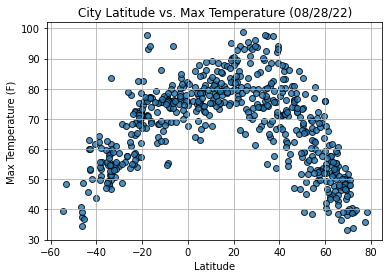

In [17]:
plt.scatter(lats, max_temp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("output_data/Fig1.png")

plt.show


## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

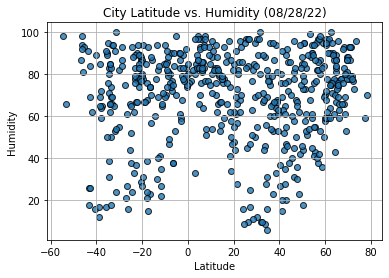

In [18]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("output_data/Fig2.png")

plt.show


## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

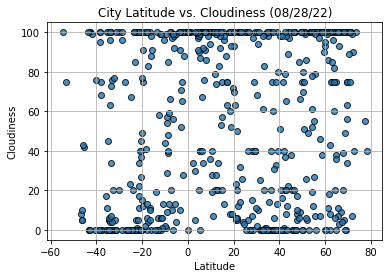

In [19]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("output_data/Fig3.png")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

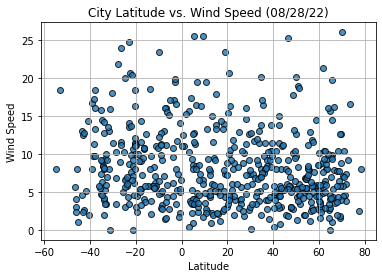

In [20]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the fig
plt.savefig("output_data/Fig4.png")

plt.show

## Linear Regression

In [21]:
# Create a function to handle lin regression model
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    #run regression on hemisphere
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [22]:
#Create hemisphere dataframes
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >=0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5409212588521403


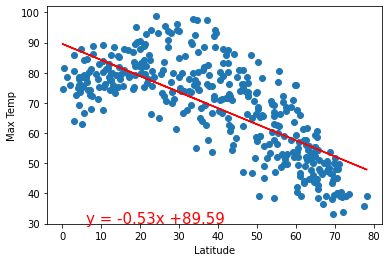

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.59136627075606


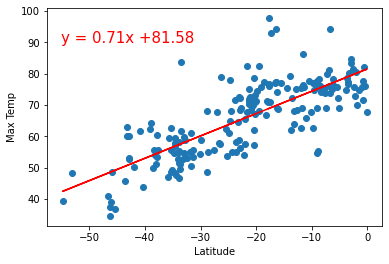

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 1.196432664057646e-05


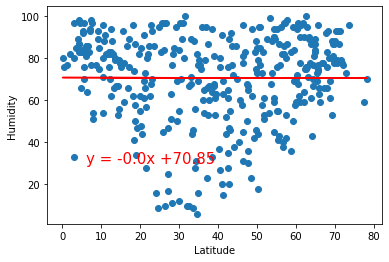

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00945635439195334


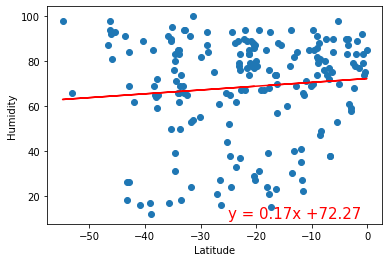

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 1.4871234942197106e-06


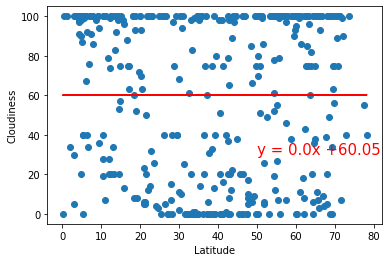

In [35]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (50,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03754691463923673


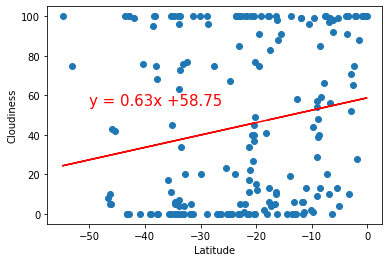

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,55))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007625646737135461


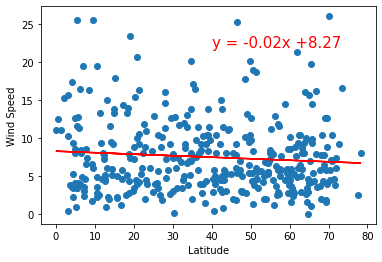

In [42]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,22))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 1.597328892363897e-05


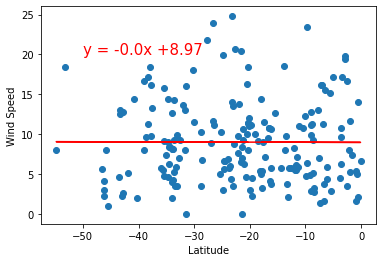

In [44]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,20))